In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_excel('selectivity_all.xlsx')
data.drop(axis=1, inplace=True, columns=['Amine'])
data

,320,321,322,323,324,325,326,327,328,329,...,992,993,994,995,996,997,998,999,1000,cat
0,0.307,0.305,0.306,0.308,0.313,0.325,0.343,0.352,0.375,0.396,...,0.080,0.079,0.078,0.077,0.077,0.076,0.075,0.075,0.074,His
1,0.339,0.339,0.339,0.342,0.348,0.359,0.376,0.384,0.404,0.421,...,0.220,0.219,0.217,0.215,0.213,0.212,0.210,0.209,0.208,Nhis
2,0.391,0.390,0.392,0.395,0.403,0.416,0.435,0.445,0.468,0.487,...,0.061,0.061,0.061,0.060,0.060,0.059,0.059,0.059,0.059,Nhis
3,0.365,0.365,0.366,0.370,0.377,0.390,0.408,0.418,0.438,0.456,...,0.159,0.158,0.157,0.156,0.155,0.153,0.152,0.151,0.151,Nhis
4,0.346,0.349,0.352,0.357,0.365,0.378,0.397,0.406,0.427,0.444,...,0.121,0.121,0.120,0.119,0.118,0.117,0.116,0.115,0.115,Nhis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.309,0.315,0.321,0.326,0.338,0.350,0.365,0.372,0.382,0.389,...,0.227,0.225,0.223,0.221,0.219,0.217,0.216,0.214,0.212,His
118,0.315,0.321,0.329,0.334,0.346,0.359,0.375,0.381,0.393,0.401,...,0.210,0.208,0.206,0.205,0.203,0.201,0.199,0.198,0.196,His
119,0.320,0.327,0.332,0.336,0.348,0.360,0.375,0.382,0.393,0.401,...,0.210,0.208,0.206,0.205,0.203,0.201,0.200,0.198,0.197,His
120,0.394,0.400,0.408,0.413,0.426,0.437,0.454,0.460,0.472,0.479,...,0.218,0.217,0.215,0.213,0.211,0.210,0.208,0.207,0.206,His


In [49]:
X = data.iloc[:,:-1]
X.columns = X.columns.astype(str)
y = data.iloc[:,-1]


In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# sc = StandardScaler()
lb = LabelEncoder()
# X = sc.fit_transform(X)
y = lb.fit_transform(y)
y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

fs_mut = SelectKBest(score_func=mutual_info_classif, k='all')
fs_mut.fit(X, y)
X_train_fs_m_info = fs_mut.transform(X)

fs_f = SelectKBest(score_func=f_classif, k='all')
fs_f.fit(X, y)
X_train_fs_f_cls = fs_f.transform(X)

fs_c = SelectKBest(score_func=chi2, k='all')
fs_c.fit(X, y)
X_train_fs_c_clas = fs_c.transform(X)

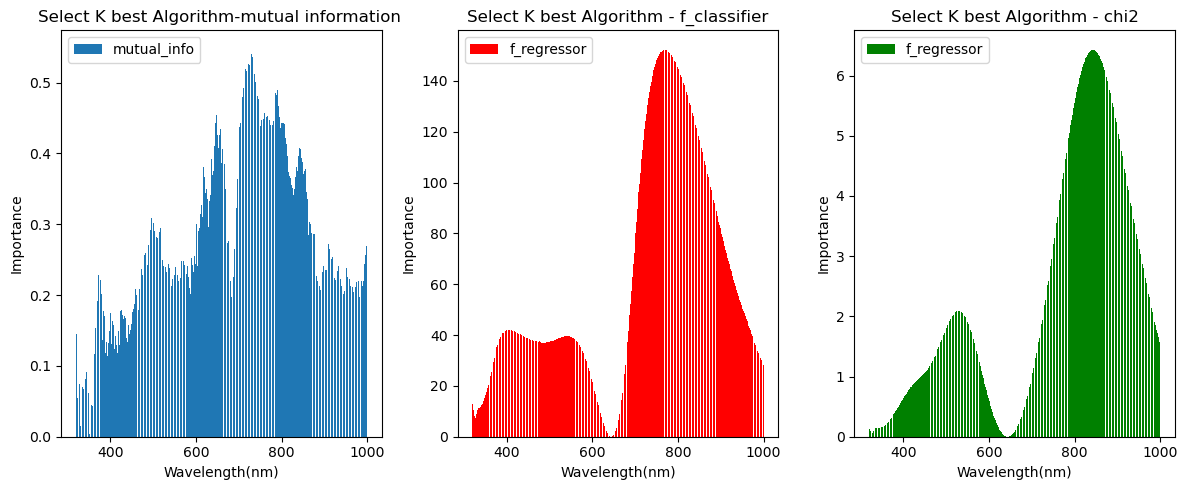

In [52]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
plt.bar([i + 320 for i in range(len(fs_mut.scores_))], fs_mut.scores_, label='mutual_info')
plt.title('Select K best Algorithm-mutual information ')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Importance')
plt.legend()

plt.subplot(1, 3, 2)
plt.bar([i + 320 for i in range(len(fs_f.scores_))], fs_f.scores_, label='f_regressor', color='red')
plt.title('Select K best Algorithm - f_classifier')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Importance')
plt.legend()

plt.subplot(1, 3, 3)
plt.bar([i + 320 for i in range(len(fs_c.scores_))], fs_c.scores_, label='f_regressor', color='green')
plt.title('Select K best Algorithm - chi2')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Importance')
plt.legend()
plt.tight_layout()

plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44, shuffle=True)

(25,)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
K = []
training = []
test = []
scores = {}
conf_mat = {}
acc_score = {}
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k, metric='minkowski', p=2)
    clf.fit(X, y)

    training_score = clf.score(X, y)
    # test_score = clf.score(X_test, y_test)
    y_pred = clf.predict(X)
    K.append(k)

    training.append(training_score)
    # test.append(test_score)
    scores[k] = [training_score]
    conf_mat[k] = confusion_matrix(y, y_pred)
    acc_score[k] = accuracy_score(y, y_pred)


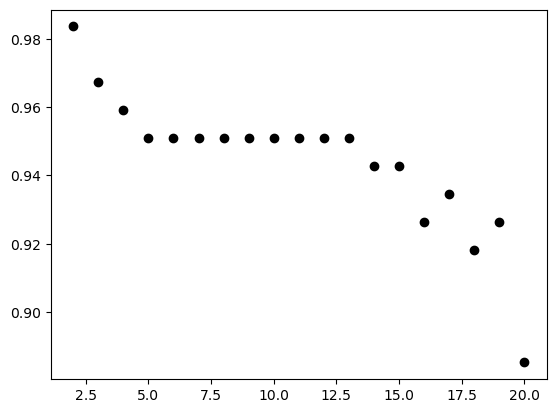

In [55]:
plt.scatter(K, training, color ='k')
# plt.scatter(K, test, color ='g')
plt.show()

In [56]:
print(conf_mat)

{2: array([[56,  0],
       [ 2, 64]]), 3: array([[54,  2],
       [ 2, 64]]), 4: array([[54,  2],
       [ 3, 63]]), 5: array([[53,  3],
       [ 3, 63]]), 6: array([[53,  3],
       [ 3, 63]]), 7: array([[53,  3],
       [ 3, 63]]), 8: array([[53,  3],
       [ 3, 63]]), 9: array([[53,  3],
       [ 3, 63]]), 10: array([[53,  3],
       [ 3, 63]]), 11: array([[53,  3],
       [ 3, 63]]), 12: array([[53,  3],
       [ 3, 63]]), 13: array([[53,  3],
       [ 3, 63]]), 14: array([[53,  3],
       [ 4, 62]]), 15: array([[52,  4],
       [ 3, 63]]), 16: array([[52,  4],
       [ 5, 61]]), 17: array([[52,  4],
       [ 4, 62]]), 18: array([[52,  4],
       [ 6, 60]]), 19: array([[52,  4],
       [ 5, 61]]), 20: array([[52,  4],
       [10, 56]])}


In [46]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])